# 1st dataset

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [808]:
df=pd.read_csv('smartphones.csv')

In [809]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [661]:
df.shape

(980, 22)

In [810]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [663]:
df.brand_name.value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: brand_name, dtype: int64

In [813]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

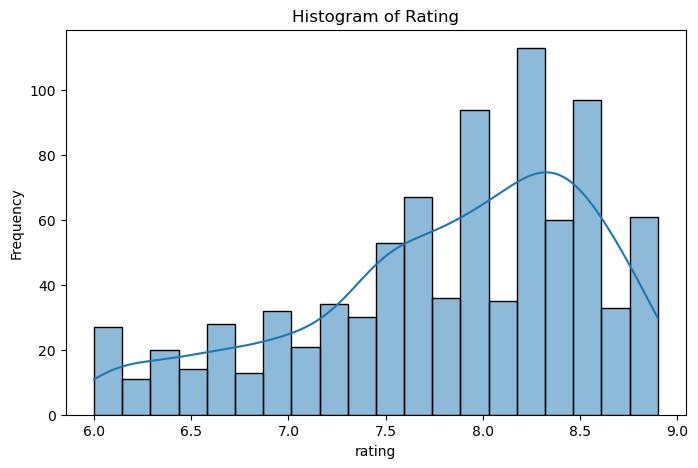

In [664]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_rating'], bins=20, kde=True)
plt.title('Histogram of Rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

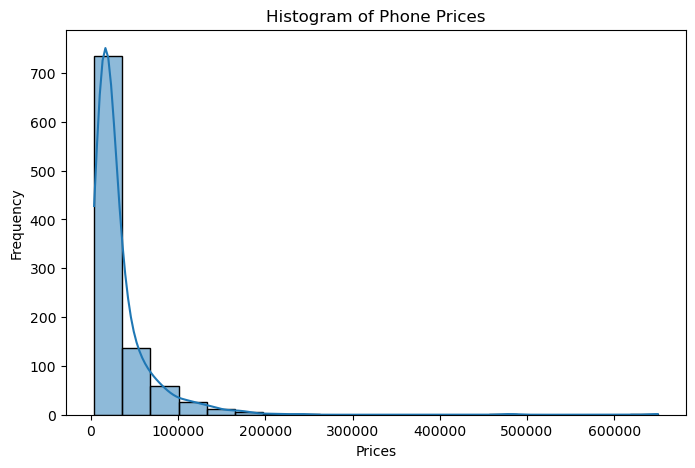

In [665]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Histogram of Phone Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

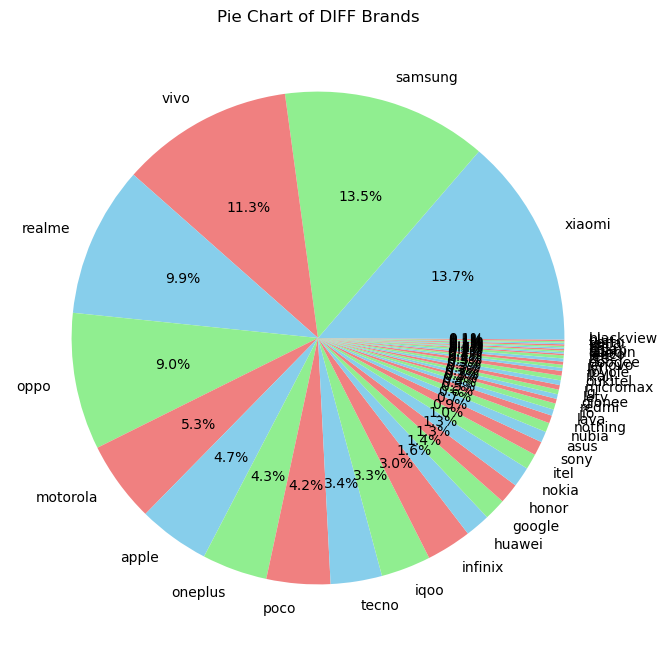

In [666]:
# Univariate Pie Chart
plt.figure(figsize=(8,8))
df['brand_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart of DIFF Brands')
plt.ylabel('')
plt.show()

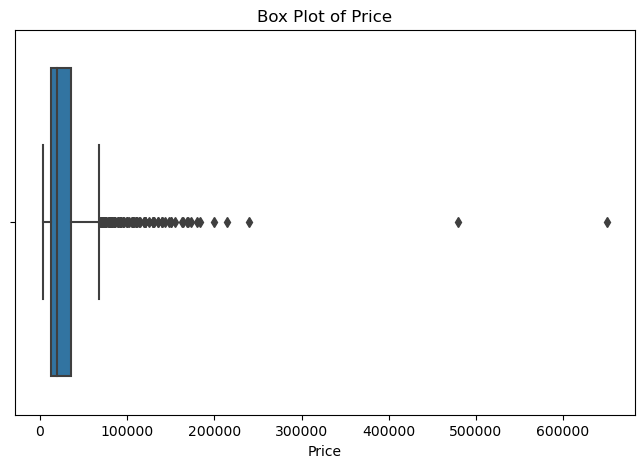

In [812]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [668]:
# LINE - PLOT

<Axes: xlabel='resolution_height', ylabel='resolution_width'>

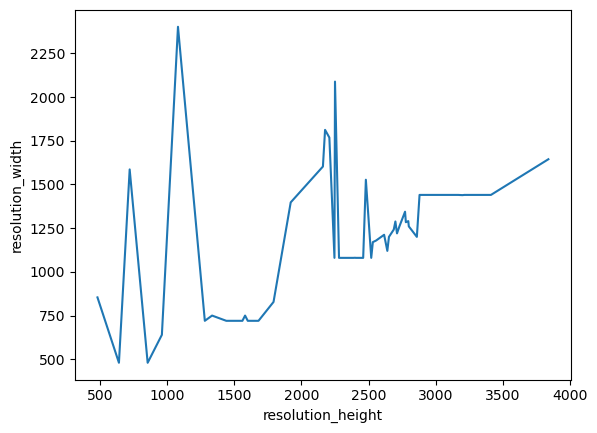

In [669]:
sns.lineplot(x='resolution_height',y='resolution_width', data=df, errorbar=None)

<Axes: xlabel='resolution_height', ylabel='resolution_width'>

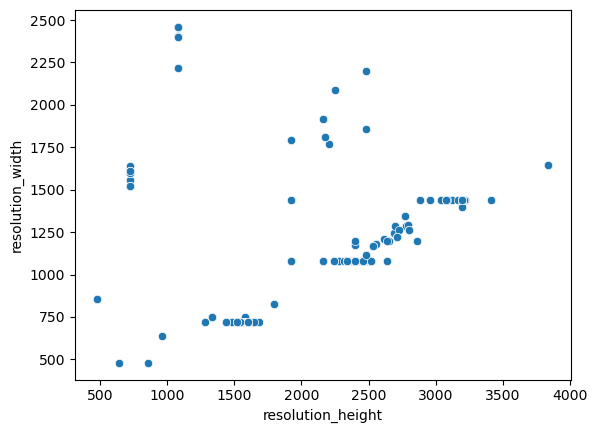

In [670]:
sns.scatterplot(x='resolution_height', y='resolution_width', data=df)

In [811]:
df['price'].groupby(df["brand_name"]).mean()

brand_name
apple         95966.521739
asus          74709.428571
blackview      8990.000000
blu           14990.000000
cat           14999.000000
cola          14999.000000
doogee        30499.000000
duoqin         9990.000000
gionee         6896.000000
google        44332.571429
honor         30301.846154
huawei        80177.250000
ikall          7632.333333
infinix       14664.793103
iqoo          30301.875000
itel           5811.000000
jio            7159.250000
lava          11246.750000
leeco         10999.000000
leitz        124990.000000
lenovo        53494.500000
letv           6165.666667
lg            63329.333333
lyf            3940.000000
micromax       6929.333333
motorola      24099.923077
nokia         24630.769231
nothing       31195.400000
nubia         49827.833333
oneplus       35858.571429
oppo          29650.034091
oukitel       26293.000000
poco          18479.195122
realme        17461.422680
redmi         15665.666667
royole       129999.000000
samsung       368

In [815]:
pd.crosstab(df.internal_memory, df.ram_capacity, values=df.price,aggfunc='mean') 

ram_capacity,1,2,3,4,6,8,12,16,18
internal_memory,,,,,,,,,
8,3999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,6244.5,9061.5,19245.000000,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,6733.5,9242.540541,9446.166667,NaN,NaN,NaN,NaN,NaN
64,NaN,168079.5,13239.533333,14063.717241,15114.896552,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,17966.693548,23179.736842,33476.681648,84574.250000,NaN,NaN
256,NaN,NaN,NaN,65665.666667,117239.714286,53646.271429,62202.028571,53830.833333,75990.0
512,NaN,NaN,NaN,91999.000000,127699.500000,165995.000000,128537.818182,79329.333333,89999.0
1024,NaN,NaN,NaN,NaN,170949.500000,NaN,163980.000000,NaN,NaN


In [ ]:
# DATA PREPROCESSING

In [816]:
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [672]:
df.dropna(inplace=True)

In [673]:
df.isna().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

In [674]:
df.drop('model',axis=1)

,brand_name,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
2,apple,109900,7.7,0,bionic,6.0,2.65,3500.0,1,18.0,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
42,apple,39900,6.3,0,bionic,6.0,2.65,1821.0,1,18.0,...,64,4.70,60,1,ios,12.0,7.0,0,1334,750
46,asus,39999,8.7,1,snapdragon,8.0,2.90,6000.0,1,65.0,...,128,6.78,144,3,android,64.0,24.0,0,2448,1080
47,asus,71999,8.6,1,snapdragon,8.0,3.20,6000.0,1,65.0,...,256,6.78,165,3,android,50.0,12.0,0,2448,1080
48,asus,72999,8.8,1,dimensity,8.0,3.20,6000.0,1,65.0,...,256,6.78,165,3,android,50.0,12.0,0,2448,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,18.0,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,18.0,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,33.0,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,55.0,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [675]:
df_num =df.select_dtypes(include='number')

In [676]:
df_num

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
2,109900,7.7,0,6.0,2.65,3500.0,1,18.0,4,64,6.50,60,3,12.0,12.0,0,2688,1242
42,39900,6.3,0,6.0,2.65,1821.0,1,18.0,3,64,4.70,60,1,12.0,7.0,0,1334,750
46,39999,8.7,1,8.0,2.90,6000.0,1,65.0,8,128,6.78,144,3,64.0,24.0,0,2448,1080
47,71999,8.6,1,8.0,3.20,6000.0,1,65.0,12,256,6.78,165,3,50.0,12.0,0,2448,1080
48,72999,8.8,1,8.0,3.20,6000.0,1,65.0,16,256,6.78,165,3,50.0,12.0,0,2448,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,13999,7.5,0,8.0,2.30,5020.0,1,18.0,4,64,6.67,60,4,48.0,16.0,1,2400,1080
976,14439,7.7,0,8.0,2.30,5020.0,1,18.0,4,128,6.67,60,4,48.0,16.0,1,2400,1080
977,16490,8.0,0,8.0,2.30,5020.0,1,33.0,6,64,6.67,60,4,64.0,32.0,1,2400,1080
978,19999,8.2,1,8.0,3.20,4200.0,1,55.0,6,128,6.90,120,4,50.0,16.0,1,2460,1080


In [677]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [678]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [679]:
X = df.drop('price',axis=1)
X

,brand_name,model,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
88,honor,Honor X9 5G,8.0,1,snapdragon,8.0,2.20,4800.0,1,66.0,...,128,6.81,60,3,android,48.0,16.0,0,2388,1080
119,infinix,Infinix Note 11 (6GB RAM + 128GB),7.7,0,helio,8.0,2.00,5000.0,1,33.0,...,128,6.70,60,3,android,50.0,16.0,1,2400,1080
123,infinix,Infinix Note 12 (G96),7.9,0,helio,8.0,2.05,5000.0,1,33.0,...,128,6.70,60,3,android,50.0,16.0,1,2400,1080
141,iqoo,iQOO 7,8.3,1,snapdragon,8.0,3.20,4400.0,1,66.0,...,128,6.62,120,3,android,48.0,16.0,0,2400,1080
143,iqoo,iQOO 7 Legend,8.4,1,snapdragon,8.0,2.84,4000.0,1,66.0,...,128,6.62,120,3,android,48.0,16.0,0,2400,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,xiaomi,Xiaomi Redmi Note 12 (6GB RAM + 128GB),7.9,1,snapdragon,8.0,2.00,5000.0,1,33.0,...,128,6.67,120,3,android,48.0,13.0,1,2400,1080
959,xiaomi,Xiaomi Redmi Note 12 Pro (8GB RAM + 128GB),8.2,1,dimensity,8.0,2.60,5000.0,1,67.0,...,128,6.67,120,3,android,50.0,16.0,0,2400,1080
961,xiaomi,Xiaomi Redmi Note 12 Pro 4G,7.7,0,snapdragon,8.0,2.30,5000.0,1,67.0,...,128,6.67,120,3,android,50.0,16.0,0,2400,1080
962,xiaomi,Xiaomi Redmi Note 12 Pro 5G,7.9,1,dimensity,8.0,2.60,5000.0,1,67.0,...,128,6.67,120,3,android,50.0,16.0,0,2400,1080


In [680]:
y=df.price
y

88     16999
119    12799
123    16999
141    24990
143    39990
       ...  
955    19988
959    26999
961    14999
962    24762
967    19999
Name: price, Length: 171, dtype: int64

In [681]:
X_num =X.select_dtypes(include='number')
X_num

,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
88,8.0,1,8.0,2.20,4800.0,1,66.0,8,128,6.81,60,3,48.0,16.0,0,2388,1080
119,7.7,0,8.0,2.00,5000.0,1,33.0,6,128,6.70,60,3,50.0,16.0,1,2400,1080
123,7.9,0,8.0,2.05,5000.0,1,33.0,8,128,6.70,60,3,50.0,16.0,1,2400,1080
141,8.3,1,8.0,3.20,4400.0,1,66.0,8,128,6.62,120,3,48.0,16.0,0,2400,1080
143,8.4,1,8.0,2.84,4000.0,1,66.0,8,128,6.62,120,3,48.0,16.0,0,2400,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,7.9,1,8.0,2.00,5000.0,1,33.0,6,128,6.67,120,3,48.0,13.0,1,2400,1080
959,8.2,1,8.0,2.60,5000.0,1,67.0,8,128,6.67,120,3,50.0,16.0,0,2400,1080
961,7.7,0,8.0,2.30,5000.0,1,67.0,6,128,6.67,120,3,50.0,16.0,0,2400,1080
962,7.9,1,8.0,2.60,5000.0,1,67.0,6,128,6.67,120,3,50.0,16.0,0,2400,1080


In [682]:
mm = MinMaxScaler()
X_num_scaled = pd.DataFrame(mm.fit_transform(X_num) ,columns=X_num.columns, index=X_num.index)
X_num_scaled


,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
88,0.500000,1.0,0.0,0.285714,0.751174,0.0,0.485714,1.0,0.0,1.000000,0.000000,0.0,0.000,0.333333,0.0,0.0,0.0
119,0.333333,0.0,0.0,0.142857,0.938967,0.0,0.171429,0.5,0.0,0.792453,0.000000,0.0,0.125,0.333333,1.0,0.5,0.0
123,0.444444,0.0,0.0,0.178571,0.938967,0.0,0.171429,1.0,0.0,0.792453,0.000000,0.0,0.125,0.333333,1.0,0.5,0.0
141,0.666667,1.0,0.0,1.000000,0.375587,0.0,0.485714,1.0,0.0,0.641509,0.571429,0.0,0.000,0.333333,0.0,0.5,0.0
143,0.722222,1.0,0.0,0.742857,0.000000,0.0,0.485714,1.0,0.0,0.641509,0.571429,0.0,0.000,0.333333,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.444444,1.0,0.0,0.142857,0.938967,0.0,0.171429,0.5,0.0,0.735849,0.571429,0.0,0.000,0.208333,1.0,0.5,0.0
959,0.611111,1.0,0.0,0.571429,0.938967,0.0,0.495238,1.0,0.0,0.735849,0.571429,0.0,0.125,0.333333,0.0,0.5,0.0
961,0.333333,0.0,0.0,0.357143,0.938967,0.0,0.495238,0.5,0.0,0.735849,0.571429,0.0,0.125,0.333333,0.0,0.5,0.0
962,0.444444,1.0,0.0,0.571429,0.938967,0.0,0.495238,0.5,0.0,0.735849,0.571429,0.0,0.125,0.333333,0.0,0.5,0.0


In [683]:
X_cat = X.select_dtypes('object')
X_cat

,brand_name,model,processor_brand,os
88,honor,Honor X9 5G,snapdragon,android
119,infinix,Infinix Note 11 (6GB RAM + 128GB),helio,android
123,infinix,Infinix Note 12 (G96),helio,android
141,iqoo,iQOO 7,snapdragon,android
143,iqoo,iQOO 7 Legend,snapdragon,android
...,...,...,...,...
955,xiaomi,Xiaomi Redmi Note 12 (6GB RAM + 128GB),snapdragon,android
959,xiaomi,Xiaomi Redmi Note 12 Pro (8GB RAM + 128GB),dimensity,android
961,xiaomi,Xiaomi Redmi Note 12 Pro 4G,snapdragon,android
962,xiaomi,Xiaomi Redmi Note 12 Pro 5G,dimensity,android


In [684]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity
X_cat_encoded 

,brand_name_honor,brand_name_infinix,brand_name_iqoo,brand_name_motorola,brand_name_nokia,brand_name_nothing,brand_name_nubia,brand_name_oneplus,brand_name_oppo,brand_name_poco,...,model_iQOO Z6 Pro 5G (8GB RAM + 128GB),model_iQOO Z7 5G,model_iQOO Z7 Pro 5G,model_iQOO Z8 5G,processor_brand_dimensity,processor_brand_exynos,processor_brand_helio,processor_brand_snapdragon,processor_brand_tiger,os_android
88,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
119,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
123,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
141,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
143,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [685]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X

,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,...,model_iQOO Z6 Pro 5G (8GB RAM + 128GB),model_iQOO Z7 5G,model_iQOO Z7 Pro 5G,model_iQOO Z8 5G,processor_brand_dimensity,processor_brand_exynos,processor_brand_helio,processor_brand_snapdragon,processor_brand_tiger,os_android
88,0.500000,1.0,0.0,0.285714,0.751174,0.0,0.485714,1.0,0.0,1.000000,...,0,0,0,0,0,0,0,1,0,1
119,0.333333,0.0,0.0,0.142857,0.938967,0.0,0.171429,0.5,0.0,0.792453,...,0,0,0,0,0,0,1,0,0,1
123,0.444444,0.0,0.0,0.178571,0.938967,0.0,0.171429,1.0,0.0,0.792453,...,0,0,0,0,0,0,1,0,0,1
141,0.666667,1.0,0.0,1.000000,0.375587,0.0,0.485714,1.0,0.0,0.641509,...,0,0,0,0,0,0,0,1,0,1
143,0.722222,1.0,0.0,0.742857,0.000000,0.0,0.485714,1.0,0.0,0.641509,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.444444,1.0,0.0,0.142857,0.938967,0.0,0.171429,0.5,0.0,0.735849,...,0,0,0,0,0,0,0,1,0,1
959,0.611111,1.0,0.0,0.571429,0.938967,0.0,0.495238,1.0,0.0,0.735849,...,0,0,0,0,1,0,0,0,0,1
961,0.333333,0.0,0.0,0.357143,0.938967,0.0,0.495238,0.5,0.0,0.735849,...,0,0,0,0,0,0,0,1,0,1
962,0.444444,1.0,0.0,0.571429,0.938967,0.0,0.495238,0.5,0.0,0.735849,...,0,0,0,0,1,0,0,0,0,1


In [686]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor

In [ ]:
# holdout method

In [817]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [822]:
# Cross Validation

In [819]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

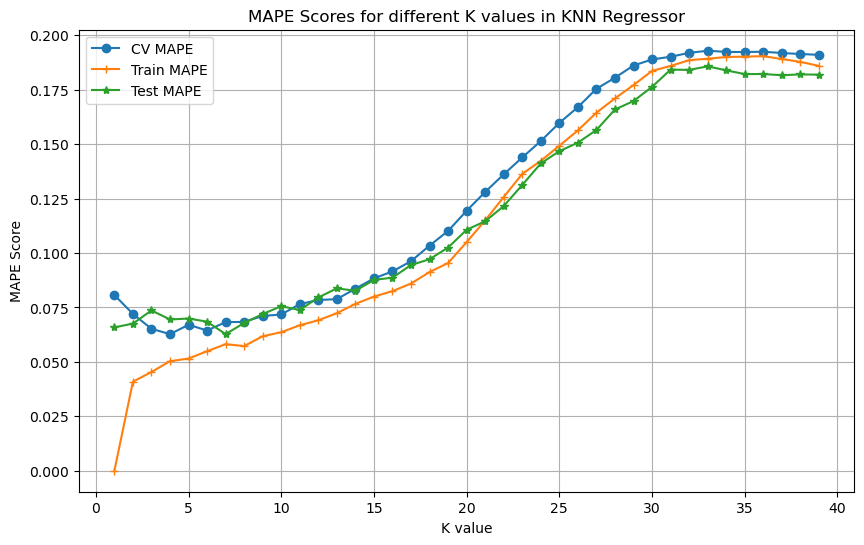

The best K value for CV is 4.


In [823]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='+', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='*', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

# 2nd Dataset

In [829]:
df = pd.read_csv("garments_worker_productivity.csv")


In [830]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [831]:
########### there are some categorical columns too

In [832]:
df.shape

(1197, 15)

In [833]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [834]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [835]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [837]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [838]:
# 1197 rows in the dataset. 
# wip has 506  missing values and it can be dropped
# Several columns are expected to have outliers as per the descriptive statistics
# 'date' column can be dropped since it is already considered with quarter and day of the week

In [839]:

df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [840]:
df.department.value_counts()          # 2 deparments with the same name has to be merged

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [841]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [842]:
df['actual_productivity'].groupby([df['day']]).mean()

day
Monday       0.735488
Saturday     0.751929
Sunday       0.728604
Thursday     0.722641
Tuesday      0.742701
Wednesday    0.730462
Name: actual_productivity, dtype: float64

In [843]:
df.groupby(['day'])['targeted_productivity','actual_productivity'].aggregate(['mean'])

C:\Users\juwel\AppData\Local\Temp\ipykernel_22144\466810630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['day'])['targeted_productivity','actual_productivity'].aggregate(['mean'])


,targeted_productivity,actual_productivity
,mean,mean
day,,
Monday,0.729397,0.735488
Saturday,0.733690,0.751929
Sunday,0.737438,0.728604
Thursday,0.720704,0.722641
Tuesday,0.727612,0.742701
Wednesday,0.729087,0.730462


In [844]:
pd.crosstab(df.department,df.day,values=df.actual_productivity,aggfunc='mean')

day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
department,,,,,,
finishing,0.712026,0.690843,0.725270,0.728957,0.718827,0.747741
finishing,0.787850,0.826654,0.771552,0.750122,0.811395,0.731104
sweing,0.724169,0.734080,0.713549,0.710772,0.728115,0.722712


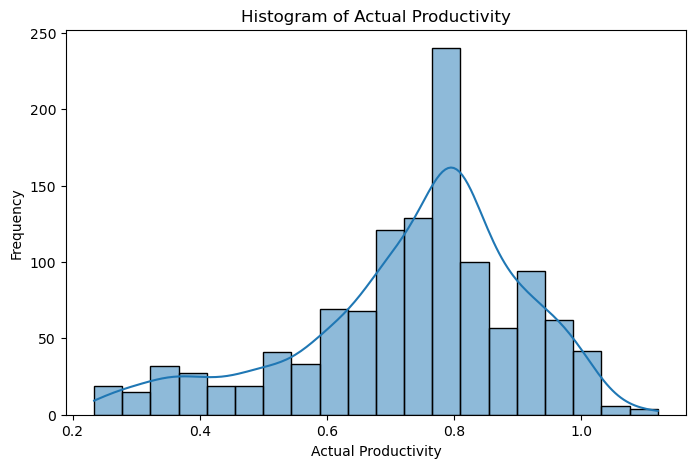

In [845]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'], bins=20, kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

In [846]:
# there are some outliers

<module 'matplotlib.pyplot' from 'C:\\Users\\juwel\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

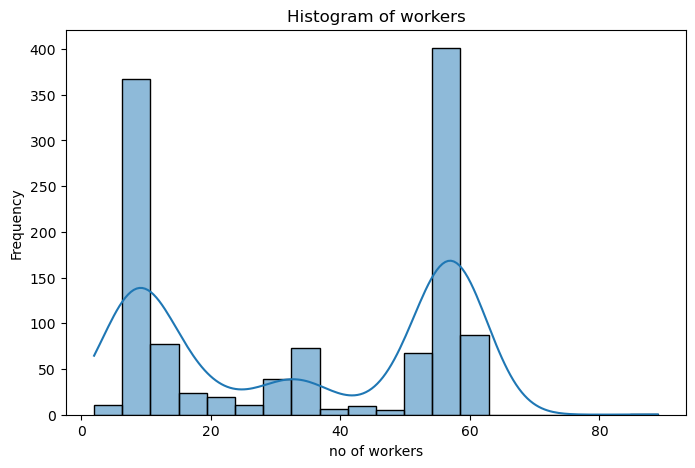

In [847]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['no_of_workers'], bins=20, kde=True)
plt.title('Histogram of workers')
plt.xlabel('no of workers')
plt.ylabel('Frequency')
plt

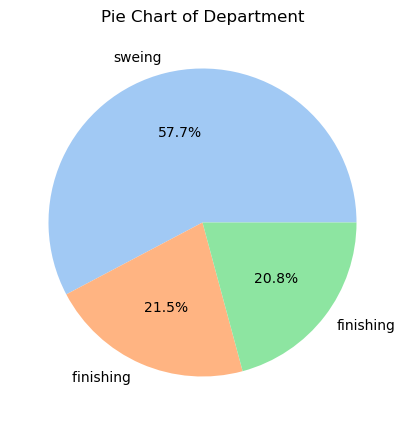

In [848]:
plt.figure(figsize=(8, 5))
df['department'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Department')
plt.ylabel('')
plt.show()

In [849]:
# box plot

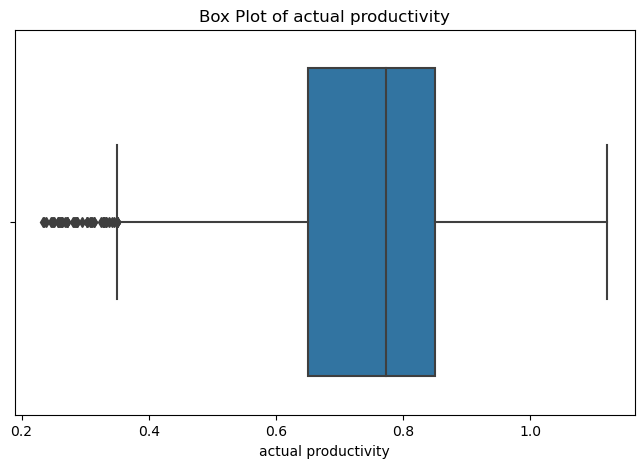

In [850]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['actual_productivity'])
plt.title('Box Plot of actual productivity')
plt.xlabel('actual productivity')
plt.show()

<Axes: xlabel='targeted_productivity', ylabel='actual_productivity'>

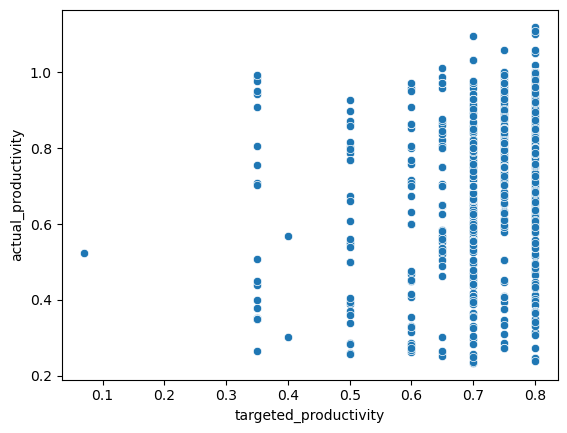

In [851]:
sns.scatterplot(x=df.targeted_productivity, y=df.actual_productivity)

<Axes: xlabel='over_time', ylabel='actual_productivity'>

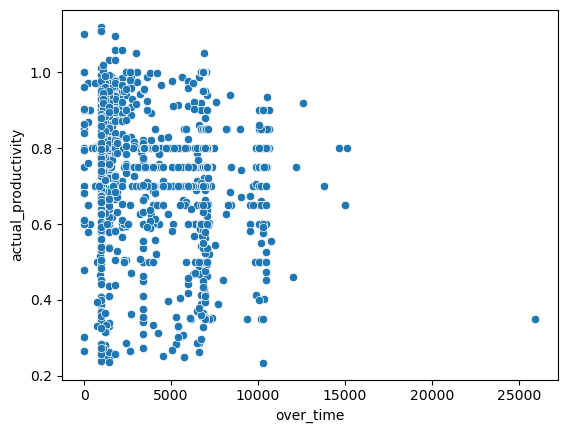

In [852]:
sns.scatterplot(x=df.over_time, y=df.actual_productivity)

In [853]:
# - The date and wip columns has to be removed
# - Outliers require rows to be trimmed
# - actual_productivity seems to have a normal distribution with most values clustered around the mean.
# - Department is categorical with 3  valuesbut 2 of them have to merged since only 2 distinct values are there

In [854]:
#preprocessing

In [855]:
df = df.drop(columns=['date', 'wip'])

In [856]:
df.shape

(1197, 13)

In [857]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [858]:
df.replace(to_replace="finishing ", value="finishing", inplace=True)

In [859]:
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [860]:
df_num = df.select_dtypes(include='number')
df_num.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [861]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [862]:
df.shape

(945, 13)

In [863]:
df_num = df.select_dtypes(include='number')


In [864]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [865]:
df.shape

(898, 13)

<Axes: xlabel='actual_productivity'>

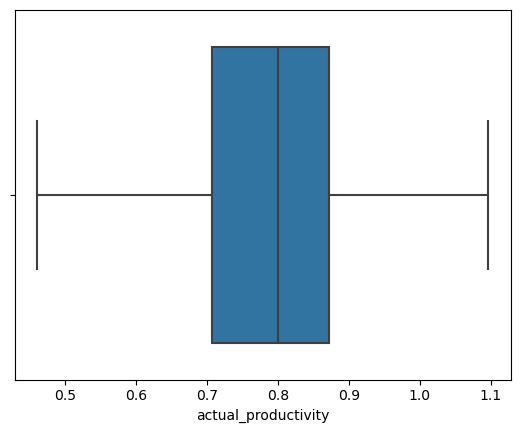

In [866]:
sns.boxplot(x=df['actual_productivity'])

In [867]:
X = df.drop('actual_productivity', axis=1)
y = df.actual_productivity
X.shape

(898, 12)

In [868]:
X_num = X.select_dtypes('number')
X_num.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,8,0.80,26.16,7080,98,0.0,0,0,59.0
1,1,0.75,3.94,960,0,0.0,0,0,8.0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5
3,12,0.80,11.41,3660,50,0.0,0,0,30.5
4,6,0.80,25.90,1920,50,0.0,0,0,56.0


In [869]:
X_cat = X.select_dtypes('object')
X_cat.head()

,quarter,department,day
0,Quarter1,sweing,Thursday
1,Quarter1,finishing,Thursday
2,Quarter1,sweing,Thursday
3,Quarter1,sweing,Thursday
4,Quarter1,sweing,Thursday


In [870]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [871]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [872]:
X_num_scaled

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0.636364,1.00,0.506313,0.468254,0.823529,0.0,0.0,0.0,0.655172
1,0.000000,0.75,0.022638,0.063492,0.000000,0.0,0.0,0.0,0.068966
2,0.909091,1.00,0.185242,0.242063,0.420168,0.0,0.0,0.0,0.327586
3,1.000000,1.00,0.185242,0.242063,0.420168,0.0,0.0,0.0,0.327586
4,0.454545,1.00,0.500653,0.126984,0.420168,0.0,0.0,0.0,0.620690
...,...,...,...,...,...,...,...,...,...
1187,0.272727,0.75,0.520679,0.468254,0.378151,0.0,0.0,0.0,0.655172
1192,0.818182,0.75,0.000000,0.063492,0.000000,0.0,0.0,0.0,0.068966
1193,0.636364,0.50,0.021768,0.063492,0.000000,0.0,0.0,0.0,0.068966
1194,0.545455,0.25,0.021768,0.063492,0.000000,0.0,0.0,0.0,0.068966


In [873]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [874]:
X_cat_encoded

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0,1,0,0,0,0,1,0,0,0,0,0,1
1192,0,1,0,0,0,1,0,0,0,0,0,0,1
1193,0,1,0,0,0,1,0,0,0,0,0,0,1
1194,0,1,0,0,0,1,0,0,0,0,0,0,1


In [875]:
 X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [876]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((898, 22), (898, 9), (898, 13))

In [877]:
X.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.0,898.0,898.0,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,0.495343,0.790646,0.236080,0.303949,0.242219,0.0,0.0,0.0,0.351132,0.353007,...,0.170379,0.043430,0.461024,0.538976,0.160356,0.162584,0.171492,0.164811,0.172606,0.168151
std,0.326949,0.273334,0.222288,0.226984,0.272072,0.0,0.0,0.0,0.253041,0.478171,...,0.376175,0.203936,0.498756,0.498756,0.367141,0.369191,0.377149,0.371216,0.378117,0.374209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.500000,0.022638,0.095238,0.000000,0.0,0.0,0.0,0.080460,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.454545,1.000000,0.189595,0.261905,0.193277,0.0,0.0,0.0,0.344828,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.818182,1.000000,0.427079,0.460317,0.420168,0.0,0.0,0.0,0.632184,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


spliting data 

In [878]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [879]:
# Holdout Method

In [880]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [881]:
# CV

In [882]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

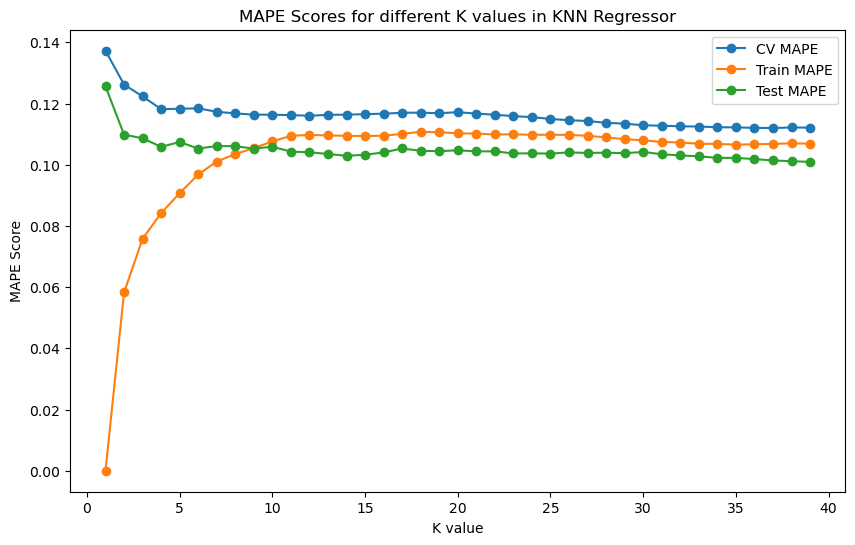

The best K value for CV is 37.


In [883]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

# 3rd datasets

In [884]:
df = pd.read_csv('cardata.csv')

In [885]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [886]:
df.shape

(301, 9)

In [887]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [888]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [889]:
# Summary statistics of numeric columns

In [890]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [891]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [892]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [893]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [894]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [895]:
df['Selling_Price'].groupby([df['Car_Name']]).mean()* 100

Car_Name
800                   35.000000
Activa 3g             31.000000
Activa 4g             40.000000
Bajaj  ct 100         18.000000
Bajaj Avenger 150     75.000000
                        ...    
sx4                  315.833333
verna                610.785714
vitara brezza        925.000000
wagon r              251.250000
xcent                496.666667
Name: Selling_Price, Length: 98, dtype: float64

In [896]:
df['Selling_Price'].groupby([df['Transmission']]).mean()* 100

Transmission
Automatic    942.000000
Manual       393.199234
Name: Selling_Price, dtype: float64

In [897]:
pd.crosstab(df.Selling_Price,df.Year,values=df.Kms_Driven,aggfunc='mean')

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Selling_Price,,,,,,,,,,,,,,,,
0.10,NaN,NaN,NaN,92233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.12,NaN,NaN,NaN,NaN,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.17,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29000.0,NaN,NaN
23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,NaN,15000.0,NaN
23.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47000.0,NaN,NaN,NaN


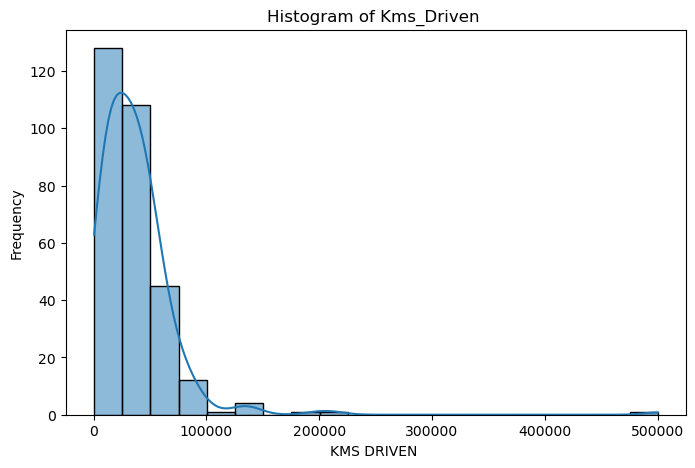

In [898]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Kms_Driven'], bins=20, kde=True)
plt.title('Histogram of Kms_Driven ')
plt.xlabel('KMS DRIVEN ')
plt.ylabel('Frequency')
plt.show()

In [899]:
# the actual productivity is normally distributed with mean around 25000km 

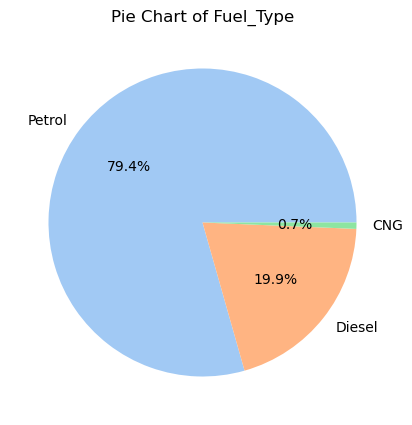

In [900]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel_Type')
plt.ylabel('')
plt.show()

In [901]:
#box plot

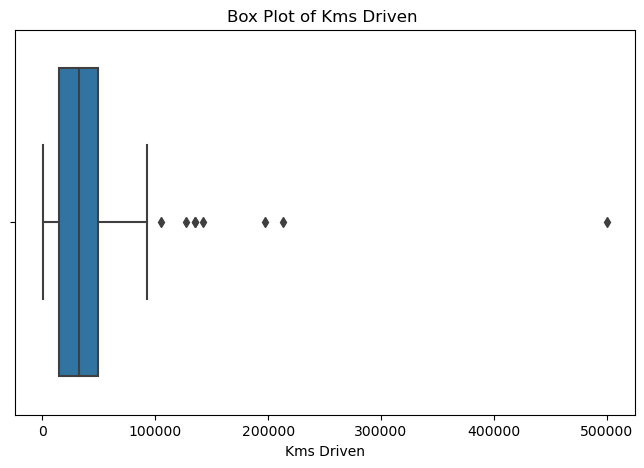

In [902]:
# Univariate Box Plot                       # some outliers in the kms column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Kms_Driven'])
plt.title('Box Plot of Kms Driven ')
plt.xlabel('Kms Driven')
plt.show()

<Axes: xlabel='Kms_Driven', ylabel='Kms_Driven'>

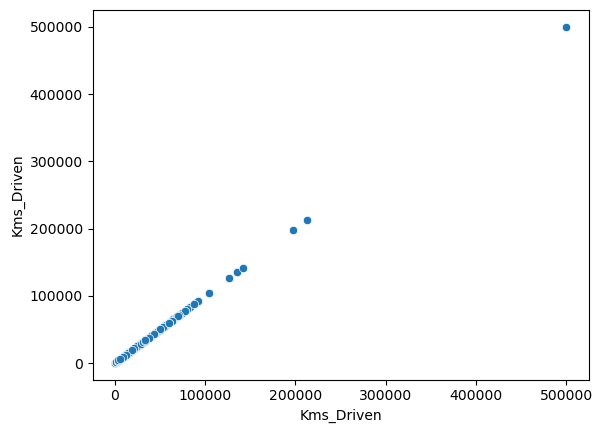

In [903]:
sns.scatterplot(x=df.Kms_Driven, y=df.Kms_Driven)

In [904]:
# Observations from data visualization
# - The Car name  column has to be removed
# - Outliers require rows to be trimmed.


# preprocessing

In [905]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [906]:
df.drop('Car_Name',axis=1,inplace=True)

In [907]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [908]:
# Split numeric columns 
df_num = df.select_dtypes(include='number')
df_num.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [909]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [910]:
df = outlier_remover(df_num,df)

In [911]:
df.shape

(264, 8)

In [912]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,264.000000,264.000000,264.000000,264.000000,264.0
mean,2013.920455,3.853030,6.209318,31969.803030,0.0
std,2.436517,3.082793,5.021113,20889.231936,0.0
min,2006.000000,0.100000,0.320000,500.000000,0.0
25%,2013.000000,0.875000,1.192500,15000.000000,0.0
50%,2015.000000,3.500000,5.900000,30876.500000,0.0
75%,2016.000000,5.812500,9.400000,45019.500000,0.0
max,2018.000000,12.900000,22.830000,92233.000000,0.0


<Axes: xlabel='Kms_Driven'>

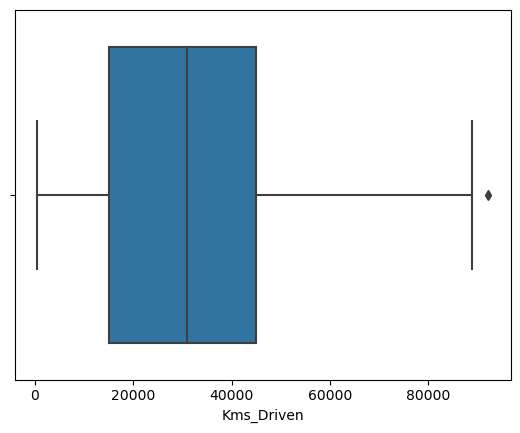

In [913]:
sns.boxplot(x=df['Kms_Driven'])

In [914]:
# taking X and y

In [915]:
X = df.drop('Kms_Driven', axis=1)
y = df.Kms_Driven
X.head()

,Year,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,Diesel,Dealer,Manual,0


In [916]:
X_num = X.select_dtypes('number')
X_num.head()

,Year,Selling_Price,Present_Price,Owner
0,2014,3.35,5.59,0
1,2013,4.75,9.54,0
2,2017,7.25,9.85,0
3,2011,2.85,4.15,0
4,2014,4.60,6.87,0


In [917]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [918]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [919]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [920]:
X_num_scaled.describe()

,Year,Selling_Price,Present_Price,Owner
count,264.000000,264.000000,264.000000,264.0
mean,0.660038,0.293205,0.261631,0.0
std,0.203043,0.240843,0.223061,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.583333,0.060547,0.038761,0.0
50%,0.750000,0.265625,0.247890,0.0
75%,0.833333,0.446289,0.403376,0.0
max,1.000000,1.000000,1.000000,0.0


In [921]:
# One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [922]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [923]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((264, 11), (264, 4), (264, 7))

In [924]:
X.isna().sum()

Year                      0
Selling_Price             0
Present_Price             0
Owner                     0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Dealer        0
Seller_Type_Individual    0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

In [925]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# KNN Regressor

In [927]:
# Holdout Method

In [928]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [929]:
# CV

In [930]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

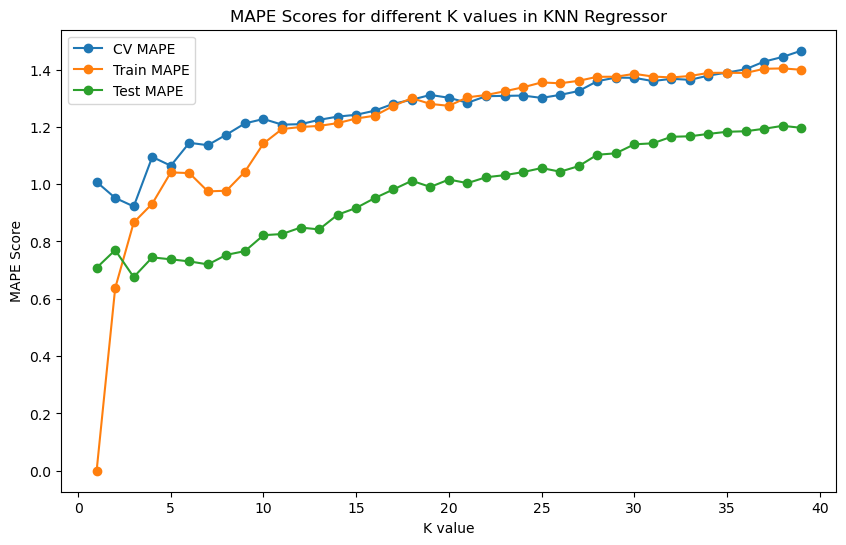

The best K value for CV is 3.


In [933]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

# 4th dataset

In [938]:
df = pd.read_csv('stroke.csv')

In [939]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [940]:
df.age

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

In [941]:
df.shape

(5110, 12)

In [942]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [943]:
# some columns require encoding as they are categorical

In [944]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [945]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [946]:
df.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [947]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [948]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [949]:
df['bmi'].groupby([df['gender']]).mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [950]:
pd.crosstab(df.gender,df.heart_disease,values=df.bmi,aggfunc='mean')

heart_disease,0,1
gender,,
Female,29.024955,30.207000
Male,28.514347,30.393007
Other,22.400000,NaN


In [951]:
# Data Visualization

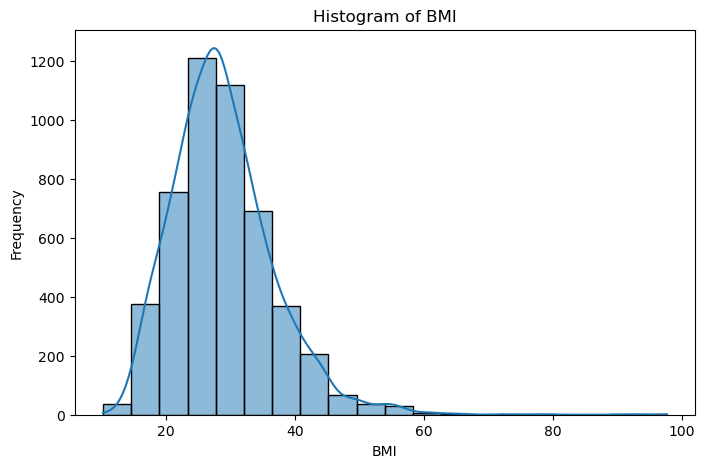

In [952]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

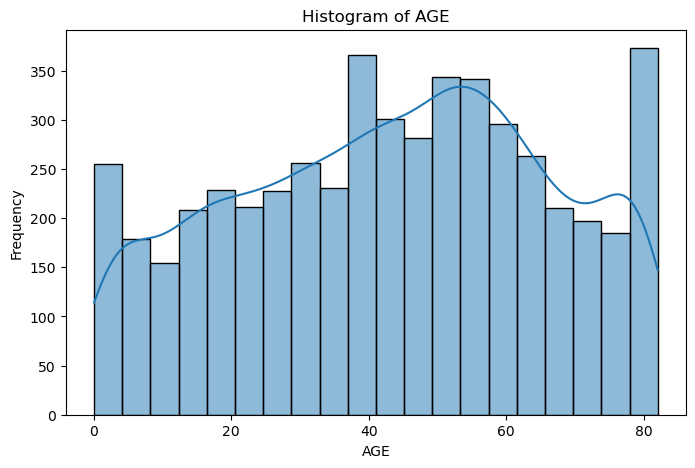

In [953]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

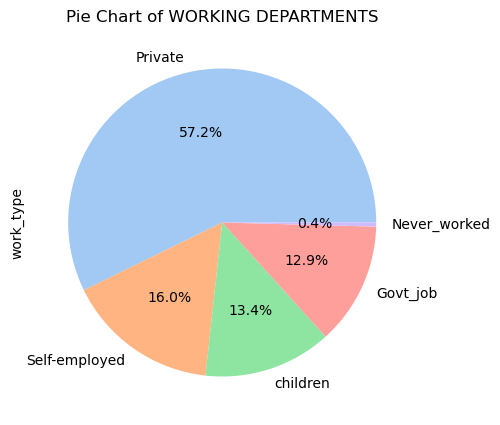

In [954]:
plt.figure(figsize=(8, 5))
df['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of WORKING DEPARTMENTS')
plt.show()

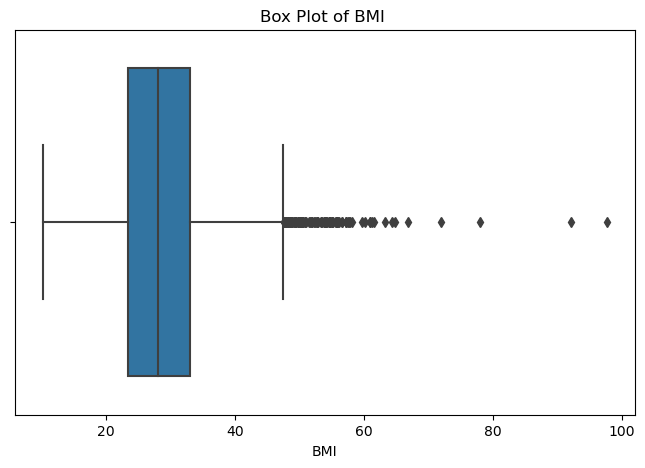

In [955]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI ')
plt.xlabel('BMI')
plt.show()

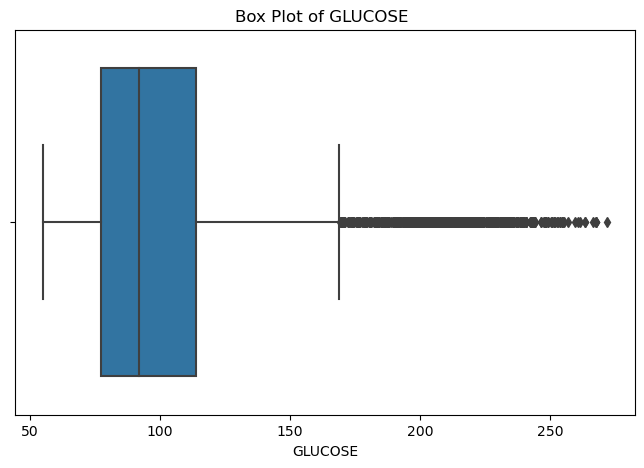

In [956]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of GLUCOSE ')
plt.xlabel('GLUCOSE')
plt.show()

<Axes: xlabel='bmi', ylabel='age'>

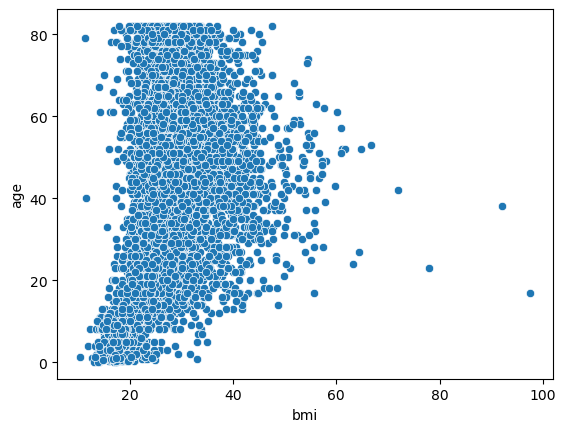

In [957]:
sns.scatterplot(x=df.bmi, y=df.age)

# data preprocessing

In [958]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [959]:
df.drop(columns=['hypertension','heart_disease'],axis=1,inplace=True)

In [435]:
df.shape

(3824, 9)

In [987]:
df.dropna(inplace = True)

In [988]:
df.shape

(4125, 10)

In [989]:
df_num = df.select_dtypes(include='number')
df_num.head()

,id,age,avg_glucose_level,bmi,stroke
249,30669,3.0,95.12,18.0,0
250,30468,58.0,87.96,39.2,0
251,16523,8.0,110.89,17.6,0
252,56543,70.0,69.04,35.9,0
253,46136,14.0,161.28,19.1,0


In [990]:
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [991]:
df = outlier_remover(df_num,df)

In [992]:
df.shape

(3998, 10)

<Axes: xlabel='avg_glucose_level'>

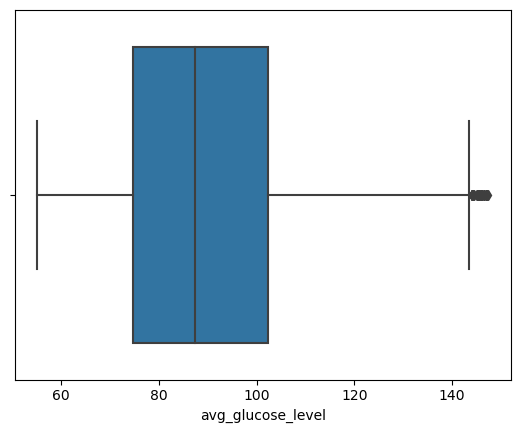

In [993]:
sns.boxplot(x=df['avg_glucose_level'])

<Axes: xlabel='bmi'>

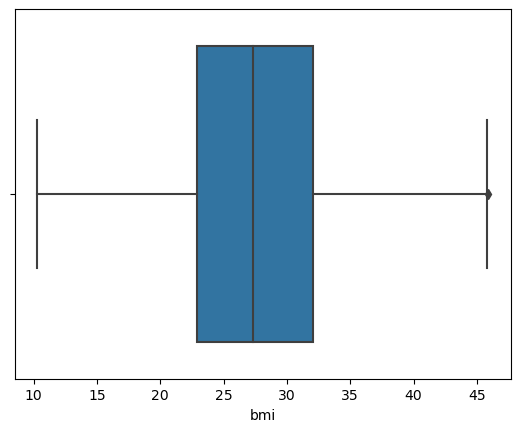

In [994]:
sns.boxplot(x=df['bmi'])

In [995]:
df.shape

(3998, 10)

In [996]:
X = df.drop('bmi', axis=1)
y = df.bmi
X.head()

,id,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
249,30669,Male,3.0,No,children,Rural,95.12,Unknown,0
250,30468,Male,58.0,Yes,Private,Urban,87.96,never smoked,0
251,16523,Female,8.0,No,Private,Urban,110.89,Unknown,0
252,56543,Female,70.0,Yes,Private,Rural,69.04,formerly smoked,0
255,52800,Female,52.0,Yes,Private,Urban,77.59,formerly smoked,0


In [997]:
X_num = X.select_dtypes('number')
X_num.head()

,id,age,avg_glucose_level,stroke
249,30669,3.0,95.12,0
250,30468,58.0,87.96,0
251,16523,8.0,110.89,0
252,56543,70.0,69.04,0
255,52800,52.0,77.59,0


In [998]:
X_cat = X.select_dtypes('object')
X_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
249,Male,No,children,Rural,Unknown
250,Male,Yes,Private,Urban,never smoked
251,Female,No,Private,Urban,Unknown
252,Female,Yes,Private,Rural,formerly smoked
255,Female,Yes,Private,Urban,formerly smoked


In [999]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [1000]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [1001]:
X_num_scaled.describe()

,id,age,avg_glucose_level,stroke
count,3998.000000,3998.000000,3998.000000,3998.0
mean,0.502556,0.483751,0.374550,0.0
std,0.287596,0.270715,0.218616,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.248065,0.267578,0.212189,0.0
50%,0.505586,0.487305,0.348429,0.0
75%,0.751211,0.694824,0.512216,0.0
max,1.000000,1.000000,1.000000,0.0


In [1002]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [1003]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [1004]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((3998, 20), (3998, 4), (3998, 16))

In [1005]:
X.isna().sum()

id                                0
age                               0
avg_glucose_level                 0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [1006]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1007]:
X_train.shape

(3198, 20)

# KNN REGRESSION

In [1008]:
# Holdout method

In [1009]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [1010]:
 # CV

In [1011]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

In [1058]:
cv_mape_scores

[625060534006629.5,
 1062890649982084.0,
 1199230669756722.2,
 1429812930181622.0,
 1626819619102224.0,
 1675194966167696.5,
 1701849460940805.5,
 1713581137141820.8,
 1695376449370982.8,
 1762062384134372.2,
 1802577519619842.8,
 1790810964758729.2,
 1809033320692762.8,
 1802622044048222.8,
 1862400721839736.0,
 1917483970087841.5,
 1954083000810786.0,
 1984269937466147.5,
 2016517924051718.5,
 2011083175240467.2,
 2009786950496276.8,
 2003591615735684.8,
 1999924652557498.5,
 1984795154354203.5,
 1962248426552686.5,
 1944597424399603.2,
 1916772592909726.5,
 1917850021367998.8,
 1934030073970100.5,
 1918333319542272.0,
 1909180456341914.5,
 1894664446612859.5,
 1888924089523318.5,
 1881497772490859.5,
 1863985479978384.5,
 1869626606187493.5,
 1852832809190952.5,
 1835555344491148.8,
 1820588590985673.5]

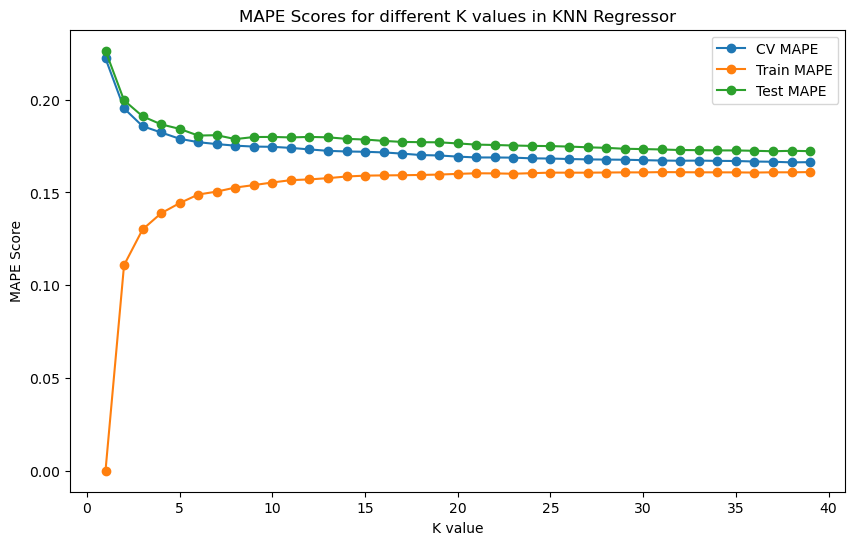

The best K value for CV is 38.


In [1012]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

# 5TH dataset

In [1013]:
df = pd.read_csv('Titanic-Dataset.csv')

In [1014]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1015]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1016]:
df.shape

(891, 12)

In [1017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1018]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1019]:
#missing value in age , cabin , embarked 
#we can drop cabin 
#we can replace age by mean
#we can drop 2 embarked rows 

In [1020]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1021]:
# Data Visualization

<Axes: xlabel='Fare', ylabel='Count'>

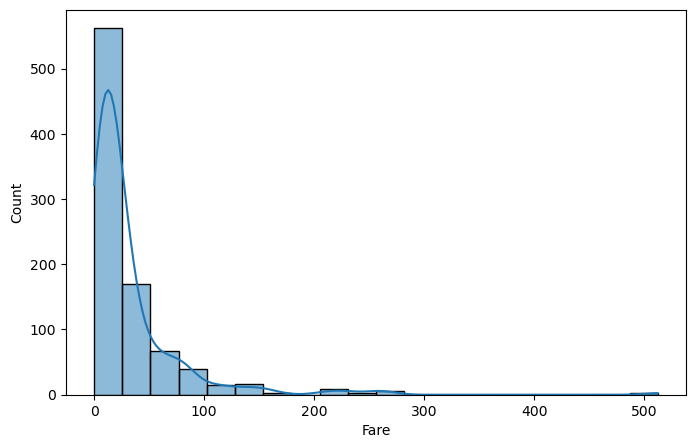

In [1022]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=20, kde=True)

<Axes: ylabel='Survived'>

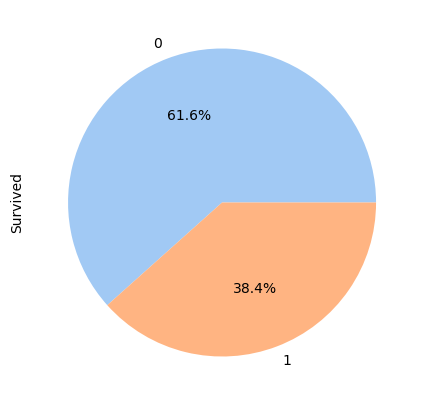

In [1023]:
plt.figure(figsize=(8, 5))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))

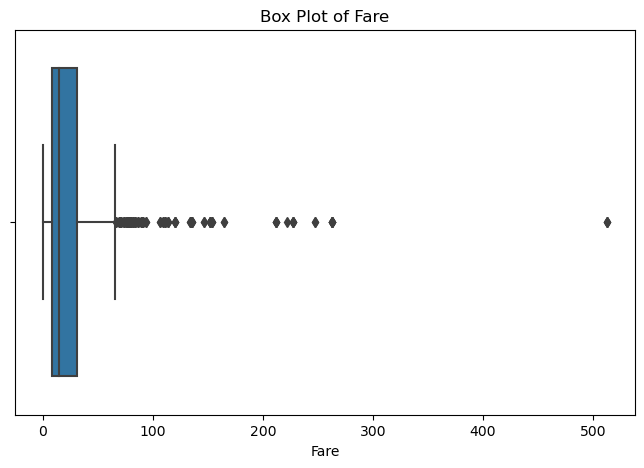

In [1024]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

<Axes: xlabel='Age'>

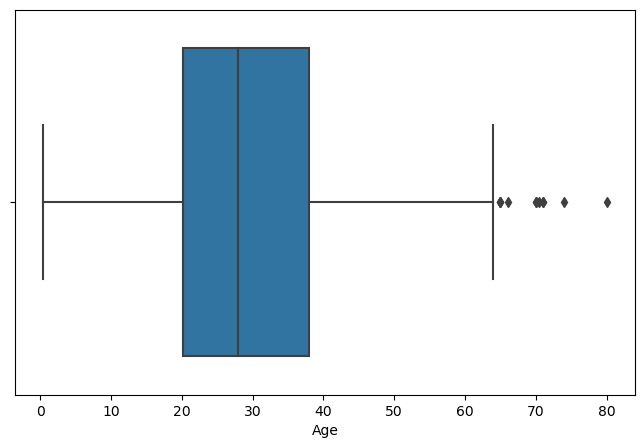

In [1025]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])

<Axes: xlabel='Fare', ylabel='Age'>

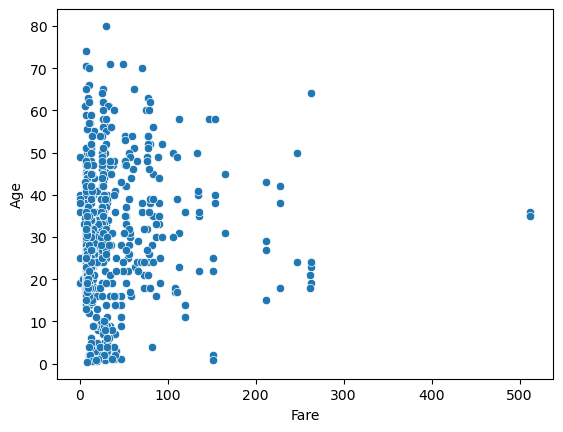

In [1026]:
sns.scatterplot(x='Fare', y='Age',data = df)

In [1027]:
df['Fare'].groupby([df['Age']]).mean()

Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 88, dtype: float64

# PREPROCESSING

In [1028]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1029]:
df=df.drop(columns=['Name','Ticket','PassengerId','Cabin'], axis = 1)

In [1030]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [1031]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1032]:
df.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [1033]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [1034]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [1035]:
df = outlier_remover(df_num,df)

In [1036]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         149
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [1037]:
#filling missig age by mean value 
df['Age'].fillna(df['Age'].mean(),inplace =True)

C:\Users\juwel\AppData\Local\Temp\ipykernel_22144\115627888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(),inplace =True)


In [1038]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,598.000000,598.000000,598.000000,598.000000,598.0,598.000000
mean,0.297659,2.471572,31.121381,0.192308,0.0,15.146236
std,0.457611,0.753570,9.939443,0.438676,0.0,12.571352
min,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,25.000000,0.000000,0.0,7.778125
50%,0.000000,3.000000,31.121381,0.000000,0.0,8.697900
75%,1.000000,3.000000,34.000000,0.000000,0.0,16.100000
max,1.000000,3.000000,64.000000,2.000000,0.0,61.175000


<Axes: xlabel='Fare'>

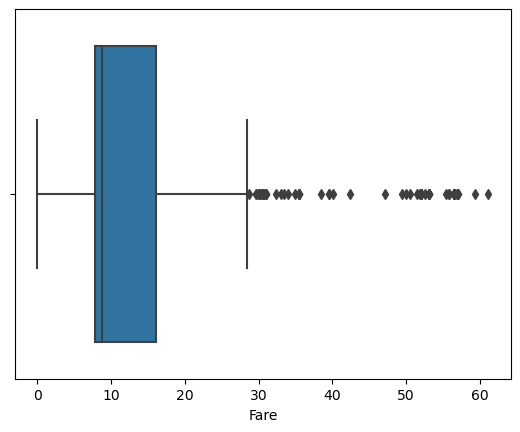

In [1039]:
sns.boxplot(x=df['Fare'])

In [1040]:
df.shape

(598, 8)

In [1041]:
X = df.drop('Fare', axis=1)
y = df.Fare
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,31.121381,0,0,Q


In [1042]:
y

0       7.2500
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
884     7.0500
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: Fare, Length: 598, dtype: float64

In [1043]:
X_num = X.select_dtypes('number')
X_num.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.000000,1,0
2,1,3,26.000000,0,0
3,1,1,35.000000,1,0
4,0,3,35.000000,0,0
5,0,3,31.121381,0,0


In [1044]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Sex,Embarked
0,male,S
2,female,S
3,female,S
4,male,S
5,male,Q


In [1045]:
mm = MinMaxScaler()
X_num_scaled = mm.fit_transform(X_num)

In [1046]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [1047]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [1048]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [1049]:
X

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.288136,0.5,0.0,0,1,0,0,1
2,1.0,1.0,0.355932,0.0,0.0,1,0,0,0,1
3,1.0,0.0,0.508475,0.5,0.0,1,0,0,0,1
4,0.0,1.0,0.508475,0.0,0.0,0,1,0,0,1
5,0.0,1.0,0.442735,0.0,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.338983,0.0,0.0,0,1,0,0,1
886,0.0,0.5,0.372881,0.0,0.0,0,1,0,0,1
887,1.0,0.0,0.237288,0.0,0.0,1,0,0,0,1
889,1.0,0.0,0.355932,0.0,0.0,0,1,1,0,0


In [1050]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((598, 10), (598, 5), (598, 5))

In [1051]:
X.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [1052]:
# Train-test split

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# KNN REGRESSION

In [1054]:
# holdout method

In [1055]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [935]:
# CV

In [1056]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

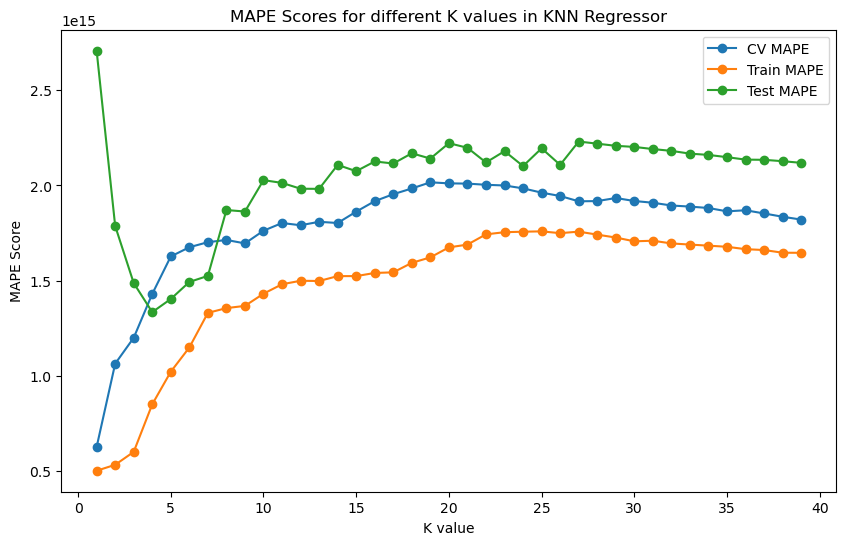

The best K value for CV is 1.


In [1057]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

# 6TH DATASET

In [1059]:
df = pd.read_csv('hr_dashboard_data.csv')

In [1060]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [1061]:
df.shape

(200, 11)

In [1062]:
df.dtypes

Name                      object
Age                        int64
Gender                    object
Projects Completed         int64
Productivity (%)           int64
Satisfaction Rate (%)      int64
Feedback Score           float64
Department                object
Position                  object
Joining Date              object
Salary                     int64
dtype: object

In [1063]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')


In [1064]:
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


In [1065]:
df.isna().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [1066]:
df.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Department', 'Position', 'Joining Date'], dtype='object')

In [1067]:
df.Age.value_counts()

25    17
26    16
23    11
30    11
28    11
29    11
36     9
27     8
35     8
33     7
39     7
44     7
42     6
24     6
40     6
41     6
34     5
31     5
51     4
45     4
58     3
22     3
43     3
57     3
49     3
50     3
54     3
48     3
59     2
32     2
38     2
47     2
46     1
55     1
60     1
Name: Age, dtype: int64

In [1068]:
df.Position.value_counts()

Manager             40
Junior Developer    35
Analyst             33
Team Lead           32
Intern              30
Senior Developer    30
Name: Position, dtype: int64

In [1069]:
df.Gender.value_counts()

Male      100
Female    100
Name: Gender, dtype: int64

In [1070]:
df['Productivity (%)'].groupby([df['Gender']]).mean()

Gender
Female    42.97
Male      50.54
Name: Productivity (%), dtype: float64

In [1071]:
pd.crosstab(df.Gender,df.Position,values= df.Salary,aggfunc='mean')

Position,Analyst,Intern,Junior Developer,Manager,Senior Developer,Team Lead
Gender,,,,,,
Female,68997.000000,35101.333333,52079.315789,108607.181818,85969.214286,97866.888889
Male,67737.809524,34521.666667,52133.562500,111905.611111,86929.750000,103263.857143


In [1072]:
# Data Visualization

<Axes: xlabel='Salary', ylabel='Count'>

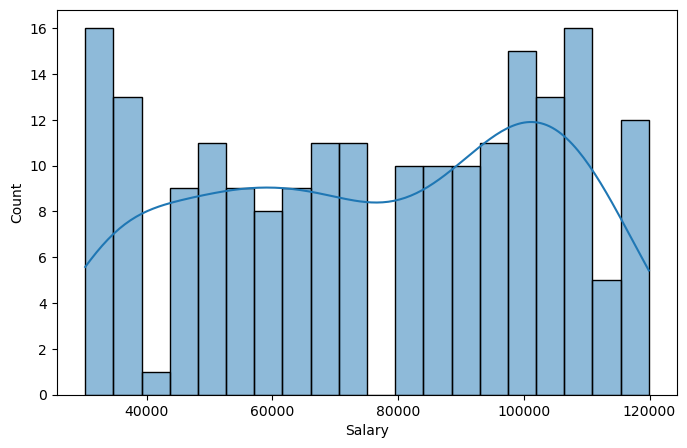

In [1073]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=20, kde=True)

<Axes: xlabel='Position', ylabel='Count'>

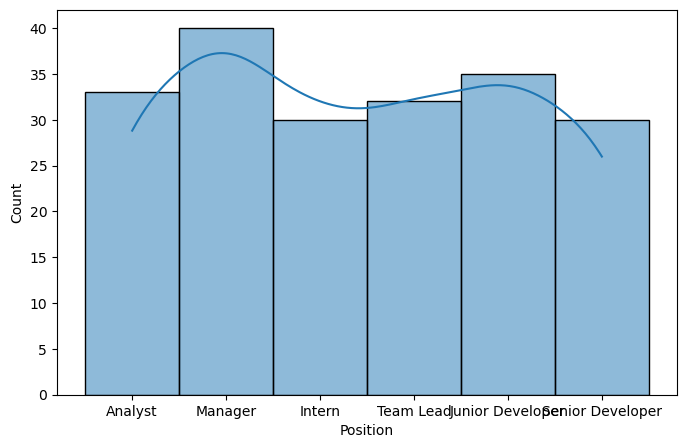

In [1074]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Position'], bins=20, kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

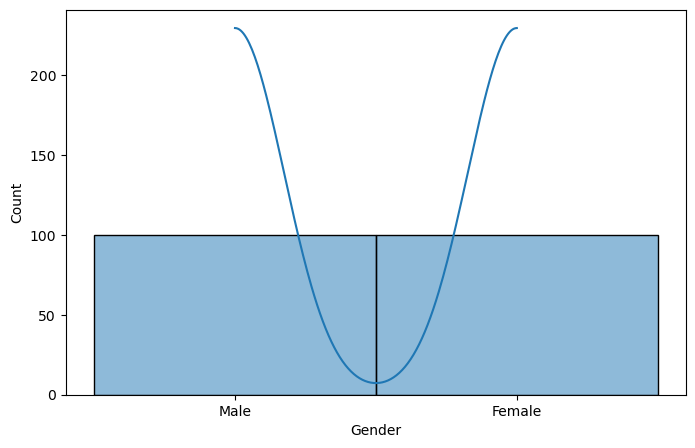

In [1075]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Gender'], bins=20, kde=True)

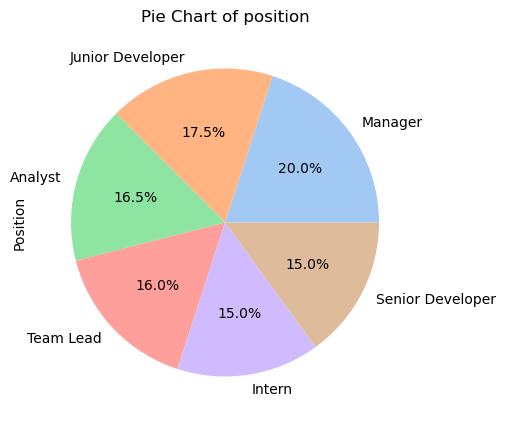

In [1076]:
plt.figure(figsize=(8, 5))
df['Position'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of position')
plt.show()

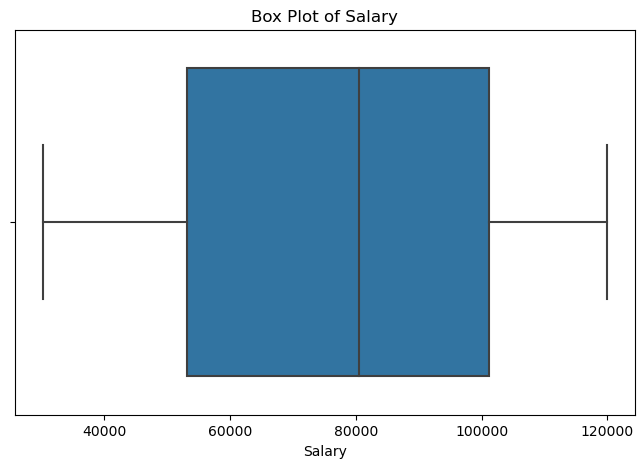

In [1077]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary'])
plt.title('Box Plot of Salary')
plt.show()

<Axes: xlabel='Salary', ylabel='Position'>

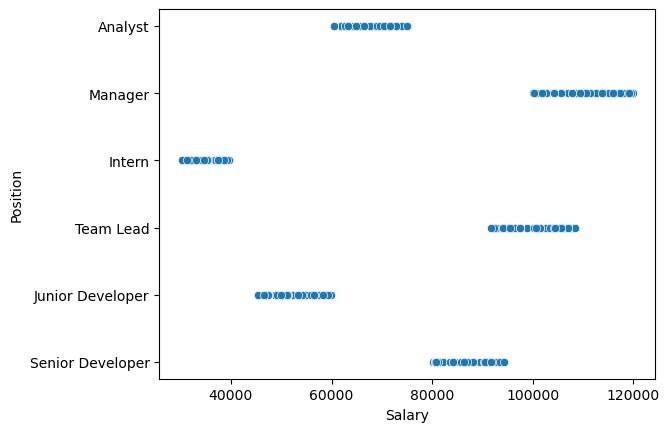

In [1078]:
sns.scatterplot(x=df.Salary, y=df.Position)

<Axes: xlabel='Salary', ylabel='Age'>

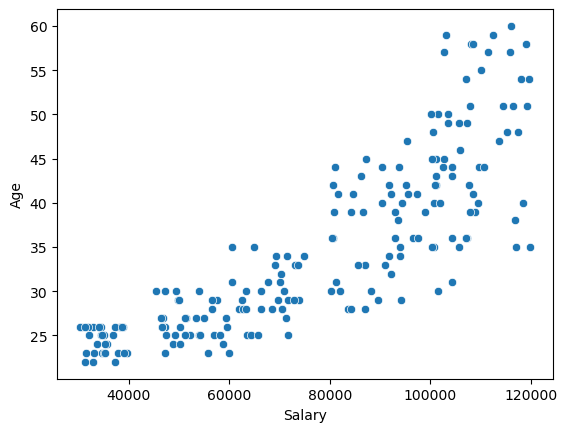

In [1079]:
sns.scatterplot(x=df.Salary, y=df.Age)

# data preprocessing

In [1080]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [1081]:
df.drop(columns = ['Name','Joining Date'],axis = 1,inplace =True)

In [1082]:
df_num = df.select_dtypes(include='number')
df_num.head()


,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
0,25,11,57,25,4.7,63596
1,59,19,55,76,2.8,112540
2,30,8,87,10,2.4,66292
3,26,1,53,4,1.4,38303
4,43,14,3,9,4.5,101133


In [1083]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df


In [1084]:
df = outlier_remover(df_num,df)

In [1085]:
df.shape

(200, 9)

In [1086]:
X = df.drop('Salary', axis=1)
y = df.Salary
X.head()

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position
0,25,Male,11,57,25,4.7,Marketing,Analyst
1,59,Female,19,55,76,2.8,IT,Manager
2,30,Male,8,87,10,2.4,IT,Analyst
3,26,Female,1,53,4,1.4,Marketing,Intern
4,43,Male,14,3,9,4.5,IT,Team Lead


In [1087]:
X_num = df.select_dtypes(include='number')

In [1088]:
X_num

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
0,25,11,57,25,4.7,63596
1,59,19,55,76,2.8,112540
2,30,8,87,10,2.4,66292
3,26,1,53,4,1.4,38303
4,43,14,3,9,4.5,101133
...,...,...,...,...,...,...
195,29,9,32,87,3.5,50051
196,26,7,45,28,2.8,46612
197,22,3,36,77,1.6,32992
198,36,23,96,50,3.4,104216


In [1089]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Gender,Department,Position
0,Male,Marketing,Analyst
1,Female,IT,Manager
2,Male,IT,Analyst
3,Female,Marketing,Intern
4,Male,IT,Team Lead


In [1090]:
mm = MinMaxScaler()
X_num_scaled = mm.fit_transform(X_num)

In [1091]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [1092]:
# One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [1093]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [1094]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((200, 19), (200, 6), (200, 13))

In [1095]:
X.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Gender_Female,Gender_Male,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Position_Analyst,Position_Intern,Position_Junior Developer,Position_Manager,Position_Senior Developer,Position_Team Lead
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.332895,0.458200,0.477092,0.499350,0.482821,0.517356,0.500000,0.500000,0.205000,0.160000,0.190000,0.21000,0.235000,0.165000,0.150000,0.175000,0.200000,0.150000,0.160000
std,0.257824,0.256354,0.291123,0.289344,0.288016,0.302042,0.501255,0.501255,0.404715,0.367526,0.393285,0.40833,0.425063,0.372112,0.357967,0.380921,0.401004,0.357967,0.367526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105263,0.240000,0.234694,0.257500,0.230769,0.254835,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.263158,0.440000,0.459184,0.505000,0.461538,0.561084,0.500000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.680000,0.714286,0.752500,0.743590,0.790476,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1096]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN REGRESSION

In [1097]:
# Holdout method

In [1098]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 40, 1)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [1099]:
# CV

In [1100]:
cv_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X,y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

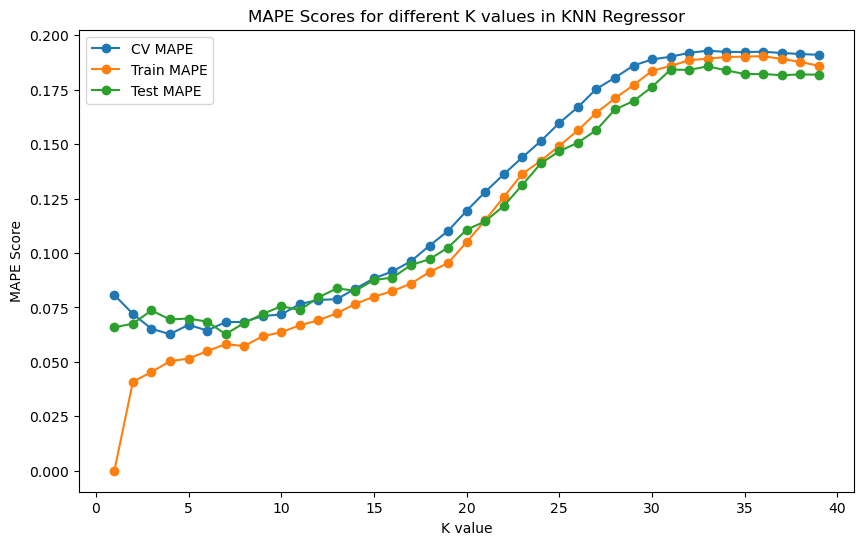

The best K value for CV is 4.


In [1101]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")